import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [258]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/sign_language_model.keras
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/.DS_Store
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/sign_language_model.h5
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/testAlexa.ipynb
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/alexa.ipynb
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/alexa_asl.py
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/test.py
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/imagenes/8.jpg
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/imagenes/9.jpg
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/imagenes/14.jpg
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/imagenes/15.jpg
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/imagenes/17.jpg
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/imagenes/16.jpg
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/imagenes/12.jpg
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/imagenes/13.jpg
/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEX

In [259]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [260]:
train_df=pd.read_csv('/Users/anaceciliaguerra/Downloads/sign_mnist_train.csv')
test_df=pd.read_csv('/Users/anaceciliaguerra/Downloads/sign_mnist_test.csv')

In [261]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [262]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [263]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [264]:
train_df.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [265]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [266]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [267]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [268]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [269]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [270]:
X_test=X_test.values.reshape(-1,28,28,1)

In [271]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [272]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

Text(0.5, 1.0, 'label: 13  letter: M')

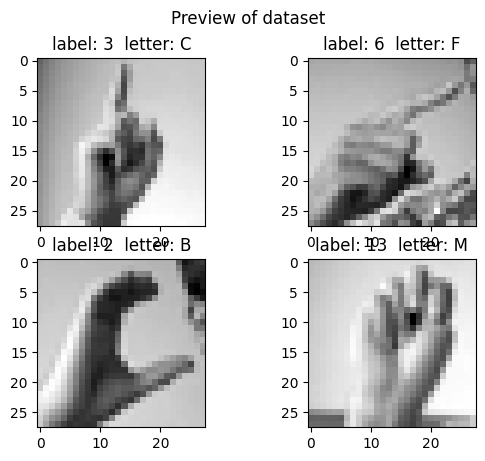

In [273]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

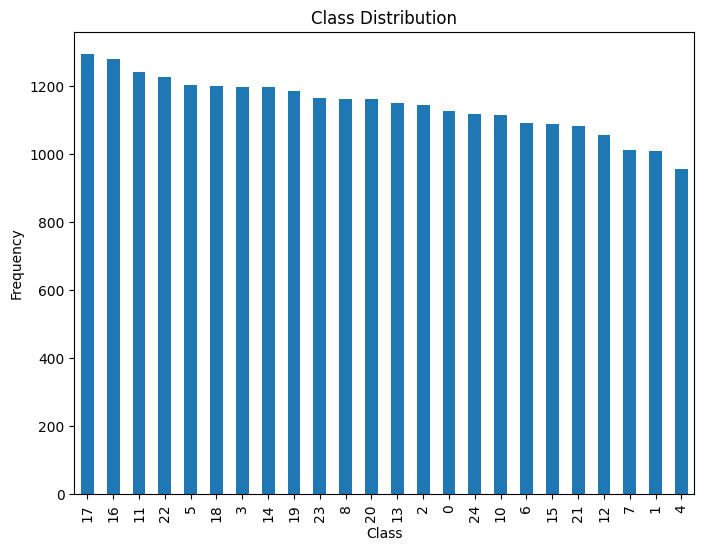

In [274]:
clases = train_df['label']
class_counts = clases.value_counts()

plt.figure(figsize=(8,6))
class_counts.plot (kind = 'bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [275]:
from tensorflow.keras.layers import Input

model=Sequential()

model.add(Input(shape=(28,28,1)))

model.add(Conv2D(128,kernel_size=(5,5), strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Conv2D(64,kernel_size=(2,2), strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

model.add(Conv2D(32,kernel_size=(2,2), strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

In [276]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,352 (1.22 MB)

 Trainable params: 319,352 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [277]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [278]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 20,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/20


/Users/anaceciliaguerra/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 65s 417ms/step - accuracy: 0.0615 - loss: 3.1378 - val_accuracy: 0.2472 - val_loss: 2.4993
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 58s 411ms/step - accuracy: 0.2280 - loss: 2.4904 - val_accuracy: 0.5135 - val_loss: 1.4986
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 53s 380ms/step - accuracy: 0.4073 - loss: 1.8226 - val_accuracy: 0.6244 - val_loss: 1.0715
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 369ms/step - accuracy: 0.5331 - loss: 1.4180 - val_accuracy: 0.6615 - val_loss: 0.9356
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 59s 422ms/step - accuracy: 0.6137 - loss: 1.1644 - val_accuracy: 0.7487 - val_loss: 0.7235
Epoch 6/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 43s 311ms/step - accuracy: 0.6754 - loss: 0.9706 - val_accuracy: 0.8123 - val_loss: 0.5348
Epoch 7/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 303ms/step - accuracy: 0.7147 - loss: 0.8465 - val_accuracy: 0.8204 - val_loss: 0.4977
Epoch 8/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 43s 305ms/step - accuracy: 0.7538 - loss: 0.7332 - val

In [293]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9791 - loss: 0.0692


In [294]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 97.97824621200562%


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step


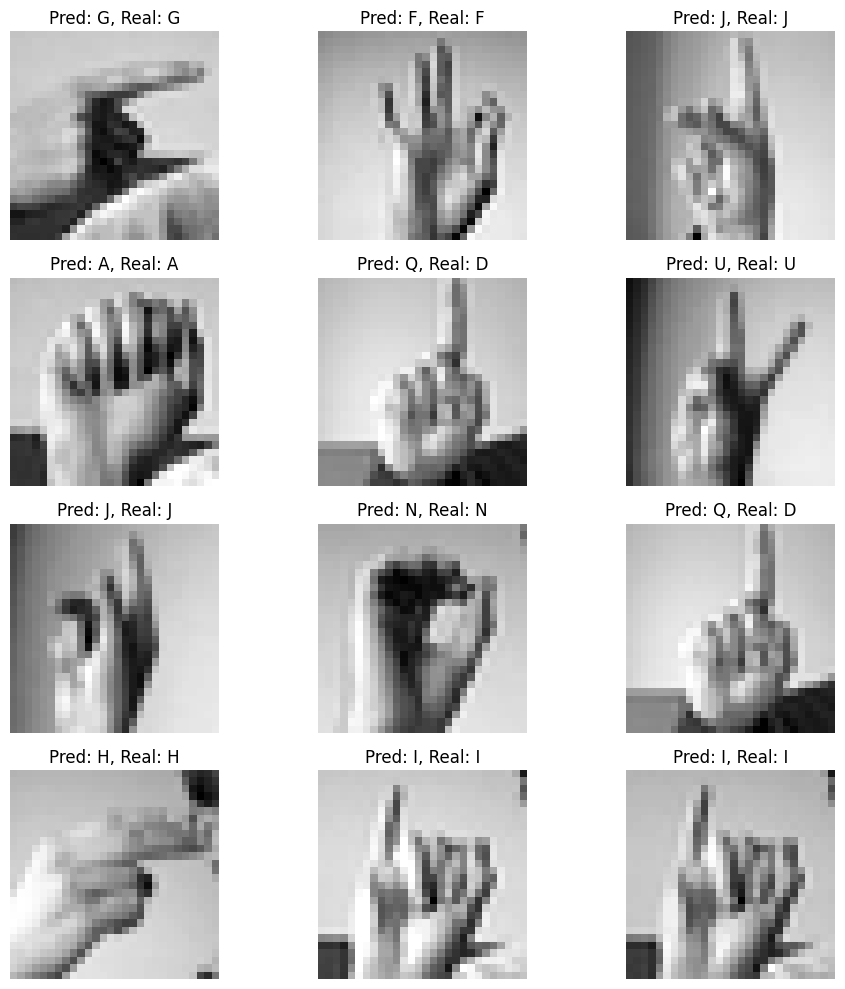

Pred: G, Real: G
only pred: H


In [299]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot some test images along with predicted and actual labels
fig, axes = plt.subplots(4, 3, figsize=(10, 10))
axes = axes.flatten()

label_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H',
    8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P',
    16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X',
    24:'Y',25:'Z'
}

for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {label_mapping[y_pred_classes[i]]}, Real: {label_mapping[y_true[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"Pred: {label_mapping[y_pred_classes[0]]}, Real: {label_mapping[y_true[0]]}")

print("only pred: "+label_mapping[y_pred_classes[9]])

In [300]:
import serial
import time

# Use the correct port for your Arduino
ser = serial.Serial('/dev/cu.usbmodem14301', 9600)  # Open serial port at 9600 baud
time.sleep(2)  # Wait for Arduino to reset

ser.write(b'1')  # Send '1' to turn the LED on
time.sleep(2)    # Wait for 2 seconds

ser.write(b'0')  # Send '0' to turn the LED off

ser.close()  # Close the serial port

In [282]:
#import numpy as np
#import cv2

#Safe [it is not torch theefore use keras]
#model.save('sign_language_model.keras')

#from keras.models import load_model

# Load the saved model
#model = load_model('sign_language_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
The model predicts the letter: P


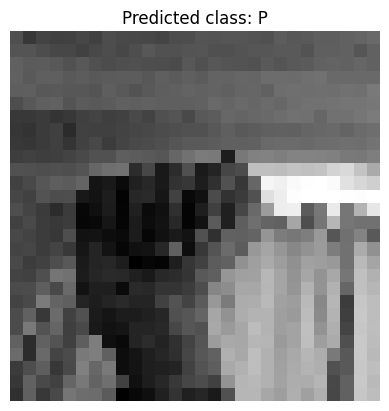

In [334]:
import cv2
import numpy as np
from keras.models import load_model

model = load_model('sign_language_model.keras')

image_path = '/Users/anaceciliaguerra/Desktop/VueJs/ASL_ALEXA/imagenes/hand_image_2.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 

image = cv2.resize(image, (28, 28))

image = image / 290.0

image = image.reshape(1, 28, 28, -1) 

predictions = model.predict(image)

predicted_class = np.argmax(predictions, axis=1)

label_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H',
    8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P',
    16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X',
    24: 'Y', 25: 'Z'
}

predicted_letter = label_mapping[predicted_class[0]]

# Output the prediction
print(f"The model predicts the letter: {predicted_letter}")
plt.imshow(image.reshape(28, 28), cmap='gray') 
plt.title(f'Predicted class: {predicted_letter}')
plt.axis('off')  # Hide axis
plt.show()